In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [30]:
snr = np.loadtxt("snr_list.txt")
mass = np.loadtxt("mass_list.txt")

In [31]:
df = pd.DataFrame(np.array([snr,mass]).T,columns=["snr","mass"])

<AxesSubplot:xlabel='mass', ylabel='snr'>

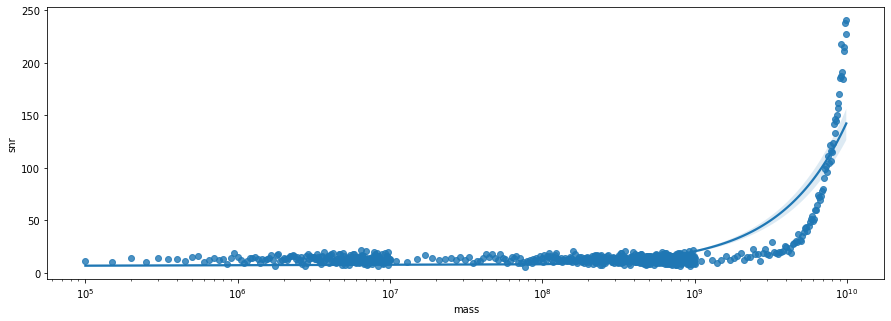

In [32]:
f, ax = plt.subplots(figsize=(15, 5))
ax.set(xscale="log")

sns.regplot(x=df.mass,y=df.snr,ax=ax)

<AxesSubplot:xlabel='mass', ylabel='snr'>

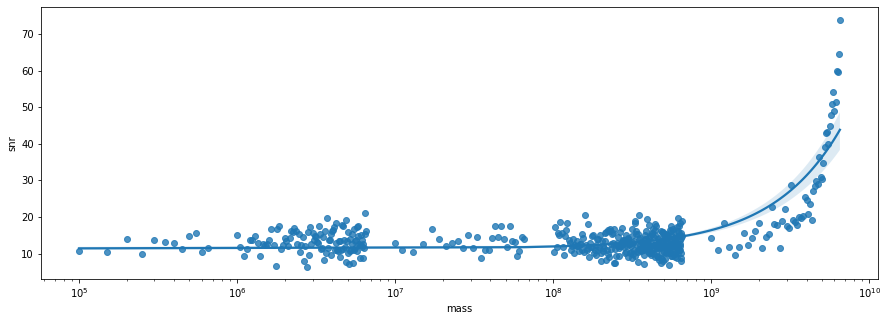

In [33]:
f, ax = plt.subplots(figsize=(15, 5))
ax.set(xscale="log")

sns.regplot(x=df.mass[:-300],y=df.snr[:-300],ax=ax)

In [34]:
trial_file = "/fred/oz002/users/mmiles/VIPER_SummerSchool/results_varyMass/mass_695000000/data_hd_1.75_5.0_695000000.0_60.0_2e-08"

In [64]:
ddf = pd.read_pickle(trial_file)
ddf = ddf.sort_values("xi")

<AxesSubplot:xlabel='xi', ylabel='rho'>

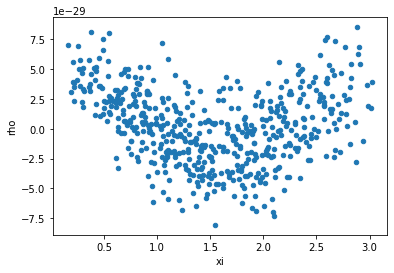

In [65]:
ddf.plot("xi","rho",kind="scatter")

In [87]:
0.1*len(ddf)

52.800000000000004

In [89]:
np.arange(len(ddf))//round(0.1*len(ddf))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [90]:
moving_ave = ddf.groupby(np.arange(len(ddf))//round(0.1*len(ddf))).mean()


<AxesSubplot:xlabel='xi', ylabel='rho'>

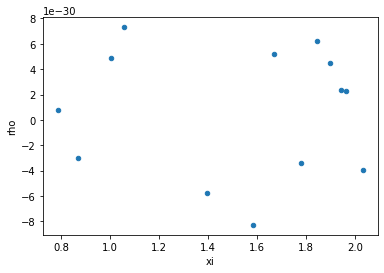

In [194]:
moving_ave.plot("xi","rho", kind="scatter")

In [161]:

def HandD(x):
    c = (1-np.cos(x))/2
    return (1/2) - (1/4)*c+ (3/2)*c*np.log(c)

def Dipole(x):
    return np.cos(x)

def Monopole(x):
    return 1 + 0*x

def plotBinnedCrossCor(xi,rho,sig,bins=13):
    temp = np.arange(0,len(xi),len(xi)/bins,dtype=np.int16)
    ranges = np.zeros(bins+1)
    ranges[0:bins]=temp
    ranges[bins]=len(xi)
    
    xiAvg = np.zeros(bins)
    rhoAvg = np.zeros(bins)
    sigmaComb = np.zeros(bins)
    
    #Need to sort by pulsar separation
    sortMask = np.argsort(xi)
    
    for i in range(bins):
        #Mask and select range of values to average
        subXi = xi[sortMask]
        subXi = subXi[int(ranges[i]):int(ranges[i+1])]
        subRho = rho[sortMask]
        subRho = subRho[int(ranges[i]):int(ranges[i+1])]
        subSig = sig[sortMask]
        subSig = subSig[int(ranges[i]):int(ranges[i+1])]
        
        #Useful to not type this out every time
        subSigSquare = np.square(subSig)
        
        #Average the separations, no weighting
        xiAvg[i] = np.average(subXi)
        
        #Average the correlated amplitude, with weighting
        rhoAvg[i] = np.sum(subRho/subSigSquare)/np.sum(1/subSigSquare)
        
        #Averaging the uncertanties
        sigmaComb[i] = 1/np.sqrt(np.sum(1/subSigSquare))
        
    return xiAvg, rhoAvg, sigmaComb

In [162]:
datadirdir = "/fred/oz002/users/mmiles/VIPER_SummerSchool/results_varyMass"

In [196]:
master_df = []
movave_df = []

for result in glob.glob(datadirdir+"/mass*/data*"):
    dftemp = pd.read_pickle(result)
    mass = result.split("/")
    mass = int(mass[-2].split("_")[-1])
    dftemp["mass"] = [mass]*len(dftemp)
    
    dftemp = dftemp.sort_values("xi")
    
    #moving_ave = dftemp.groupby(np.arange(len(dftemp))//round(0.1*len(dftemp))).mean()
    avexi, averho, avesig = plotBinnedCrossCor(dftemp.xi,dftemp.rho,dftemp.sig)
    avedata = [avexi,averho,avesig]
    avedata = np.array(avedata)
    
    moving_ave = pd.DataFrame(avedata.T,columns=["xi","rho","sig"])
    moving_ave["mass"] = [mass]*len(moving_ave)
    moving_ave = moving_ave.sort_values("xi")
    
    master_df.append(dftemp)
    movave_df.append(moving_ave)
    
mass_df = pd.concat(master_df)
mass_ave_df = pd.concat(movave_df)
    

In [164]:
avexi, averho, avesig = plotBinnedCrossCor(dftemp.xi,dftemp.rho,dftemp.sig)

In [155]:
mass_ave_df


,xi,rho,sig,mass
0,1.696671,4.215745e-30,3.780409e-30,3400000
1,1.588001,7.766780e-31,3.903367e-30,3400000
2,1.848030,4.083718e-31,3.701269e-30,3400000
3,1.850591,-2.441948e-30,3.701191e-30,3400000
4,2.041658,2.888102e-30,3.737610e-30,3400000
...,...,...,...,...
5,1.954039,-1.886996e-30,3.722643e-30,51000000
6,1.443073,-1.441608e-30,3.696214e-30,51000000
7,1.089980,5.158729e-30,3.697183e-30,51000000
8,0.924757,4.302172e-31,3.696794e-30,51000000


In [ ]:
mass_df = mass_df.reset_index(drop=True)
mass_df

In [ ]:
mass_ave_df = mass_ave_df.reset_index(drop=True)
#mass_ave_df['mass'] = mass_ave_df['mass'].map(lambda x: str(x))
mass_ave_df

<AxesSubplot:xlabel='xi', ylabel='rho'>

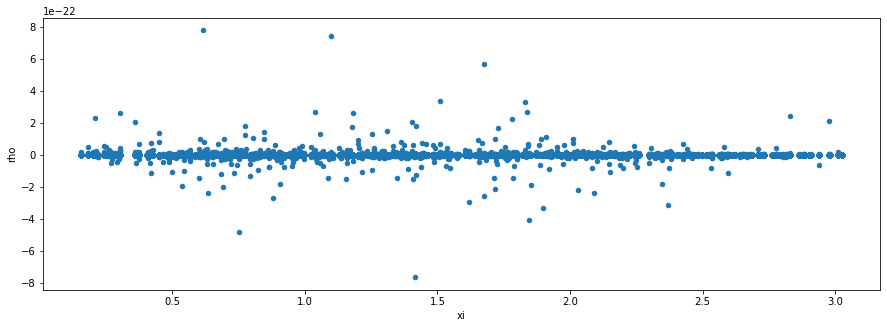

In [135]:
mass_df.plot("xi","rho",kind="scatter",figsize=(15,5))

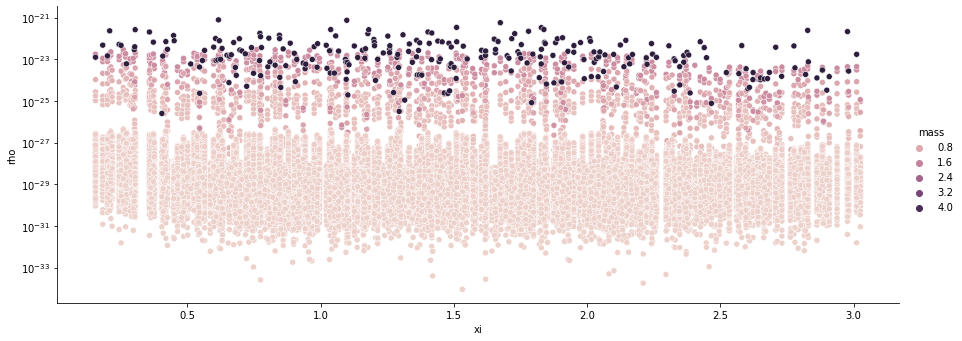

In [184]:
g = sns.relplot(data=mass_df, x='xi', y='rho', hue='mass', aspect=2.5)
g.set(yscale="log")

plt.show()

In [190]:
mass_df.mass

0          3400000
1          3400000
2          3400000
3          3400000
4          3400000
            ...   
418699    51000000
418700    51000000
418701    51000000
418702    51000000
418703    51000000
Name: mass, Length: 418704, dtype: int64

In [175]:
mass_ave_df[mass_ave_df.mass<50000000]

,xi,rho,sig,mass
0,1.583425,3.329284e-30,4.278935e-30,3400000
1,1.776694,1.222701e-30,4.476865e-30,3400000
2,1.669899,-8.726250e-31,4.319141e-30,3400000
3,1.845104,4.704043e-30,4.221367e-30,3400000
4,1.942647,-2.131984e-30,4.218296e-30,3400000
...,...,...,...,...
10291,1.394091,-7.695157e-30,4.215046e-30,7100000
10292,1.057047,7.743256e-32,4.215883e-30,7100000
10293,1.002195,-2.742539e-30,4.215122e-30,7100000
10294,0.869195,5.342833e-30,4.216336e-30,7100000


In [ ]:
g = sns.relplot(data=mass_ave_df, x='xi', y='rho', hue='mass', kind="line",aspect=2.5)
#g.set(yscale="log")

plt.show()

In [159]:
mass_ave_df

,xi,rho,sig,mass
0,1.696671,4.215745e-30,3.780409e-30,3400000
1,1.588001,7.766780e-31,3.903367e-30,3400000
2,1.848030,4.083718e-31,3.701269e-30,3400000
3,1.850591,-2.441948e-30,3.701191e-30,3400000
4,2.041658,2.888102e-30,3.737610e-30,3400000
...,...,...,...,...
7925,1.954039,-1.886996e-30,3.722643e-30,51000000
7926,1.443073,-1.441608e-30,3.696214e-30,51000000
7927,1.089980,5.158729e-30,3.697183e-30,51000000
7928,0.924757,4.302172e-31,3.696794e-30,51000000


/tmp/ipykernel_13754/4203283230.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


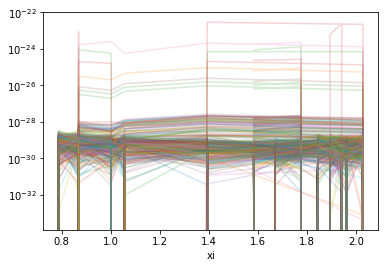

In [168]:
hd_df = []
hdave_df = []

fig, ax = plt.subplots()

for result in glob.glob(datadirdir+"/mass*/data*"):
    dftemp = pd.read_pickle(result)
    mass = result.split("/")
    mass = int(mass[-2].split("_")[-1])
    dftemp["mass"] = [mass]*len(dftemp)
    
    dftemp = dftemp.sort_values("xi")

    avexi, averho, avesig = plotBinnedCrossCor(dftemp.xi,dftemp.rho,dftemp.sig)
    avedata = [avexi,averho,avesig]
    avedata = np.array(avedata)
    
    moving_ave = pd.DataFrame(avedata.T,columns=["xi","rho","sig"])
    moving_ave["mass"] = [mass]*len(moving_ave)
    moving_ave.plot("xi","rho",alpha=0.2,ax=ax,legend=False,logy=True)
    
#mass_df = pd.concat(master_df)
#mass_ave_df = pd.concat(movave_df)

fig.show()